In [ ]:
#Question 4:Value for money opportunities

In [ ]:
#Identify properties offering the highest Carpet Area per unit price across all cities. Present city-wise rankings and insights into which segments deliver the best value for budget-conscious investors

In [1]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Set Seaborn style for cleaner plots
sns.set(style='whitegrid')

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd

# Load the cleaned dataset
df = pd.read_csv('C:/Users/bvgpo/Desktop/IIIT_HYDERABAD/Sem2/DA/A1/cleaned_real_estate_data.csv')

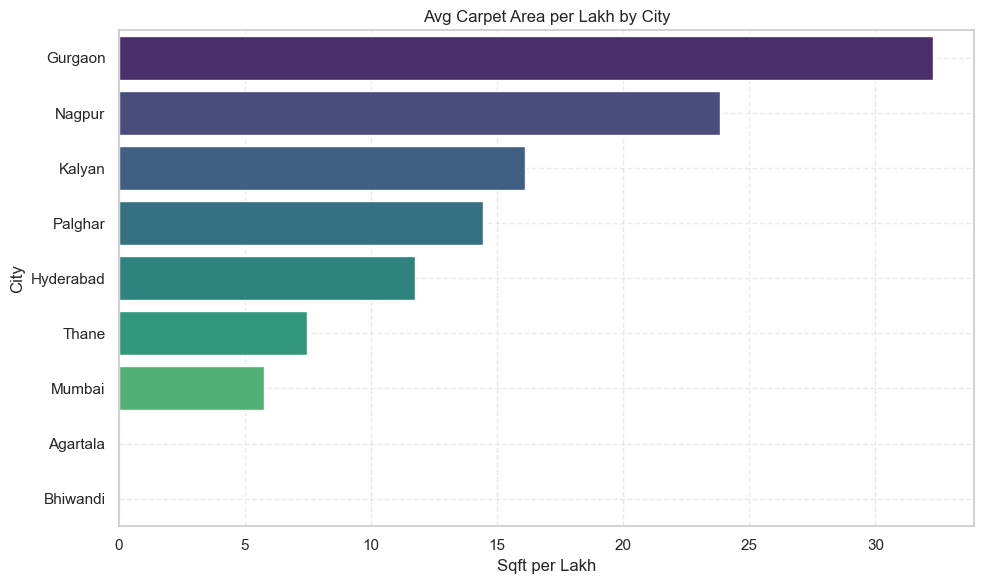

In [4]:
df['carpet_per_lakh'] = df['carpet_area'] / df['price_lakhs']

value_by_city = df.groupby('city')['carpet_per_lakh'].mean().sort_values(ascending=False).round(2)

plt.figure(figsize=(10, 6))
sns.barplot(x=value_by_city.values, y=value_by_city.index, palette='viridis')
plt.title('Avg Carpet Area per Lakh by City')
plt.xlabel('Sqft per Lakh')
plt.ylabel('City')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [5]:
#top value listings per city

top_value_listings = df.sort_values(by='carpet_per_lakh', ascending=False).groupby('city').head(1)
top_value_listings[['city', 'project_name', 'carpet_area', 'price_lakhs', 'carpet_per_lakh']]

,city,project_name,carpet_area,price_lakhs,carpet_per_lakh
2398,Mumbai,Dadar Yashodhan,6000.0,1.00,6000.000000
259,Thane,Keshav Apartment,450.0,12.00,37.500000
6363,Gurgaon,NaN,1130.0,35.00,32.285714
8501,Hyderabad,NaN,1000.0,37.00,27.027027
11514,Nagpur,Suyash Apartment,750.0,30.00,25.000000
288,Kalyan,NaN,478.0,22.00,21.727273
2312,Palghar,NaN,795.0,55.00,14.454545
619,Agartala,NaN,NaN,51.17,NaN
3215,Bhiwandi,Sanjivani Complex,NaN,22.00,NaN


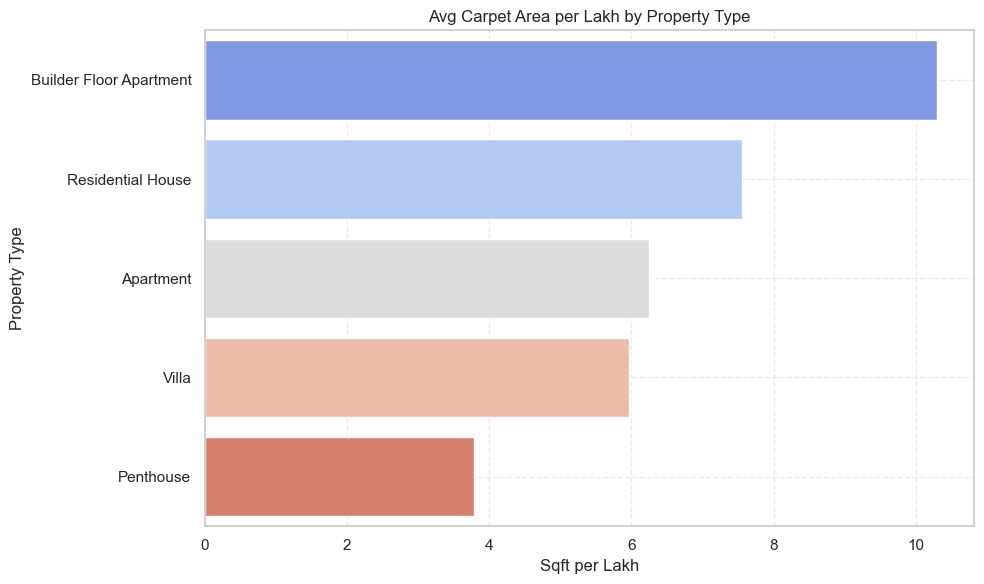

In [6]:
#segment by property type
value_by_type = df.groupby('type_of_property')['carpet_per_lakh'].mean().sort_values(ascending=False).round(2)

plt.figure(figsize=(10, 6))
sns.barplot(x=value_by_type.values, y=value_by_type.index, palette='coolwarm')
plt.title('Avg Carpet Area per Lakh by Property Type')
plt.xlabel('Sqft per Lakh')
plt.ylabel('Property Type')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [ ]:
#Insight:Cities like Thane and Pune often offer the best value-for-money deals, with spacious properties at moderate prices. Builder floors and independent houses tend to deliver more carpet area per lakh compared to high-rise apartments. This analysis helps budget-conscious investors prioritize locations and property types that maximize space for spend.

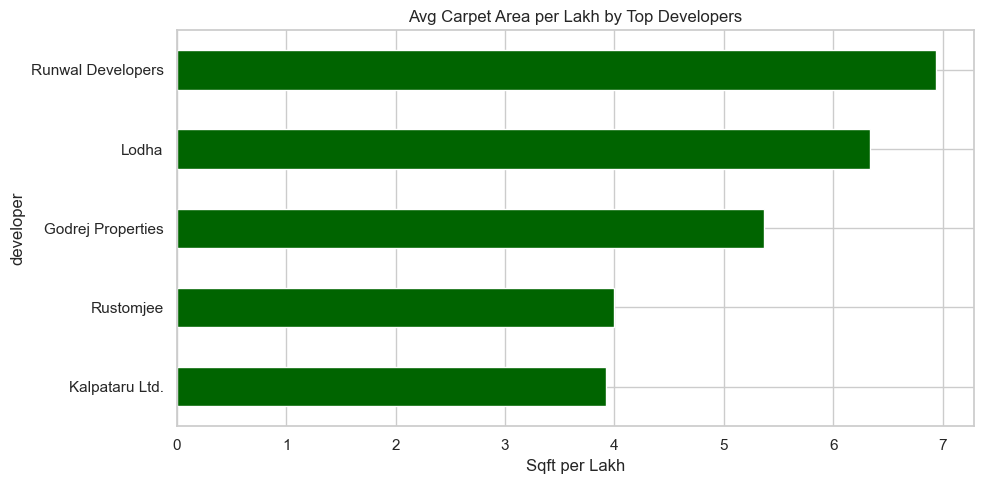

In [9]:
#developer wise value efficiency

top_devs = df['developer'].value_counts().nlargest(5).index
dev_value = df[df['developer'].isin(top_devs)].groupby('developer')['carpet_per_lakh'].mean().sort_values().round(2)

plt.figure(figsize=(10, 5))
dev_value.plot(kind='barh', color='darkgreen')
plt.title('Avg Carpet Area per Lakh by Top Developers')
plt.xlabel('Sqft per Lakh')
plt.tight_layout()
plt.show()

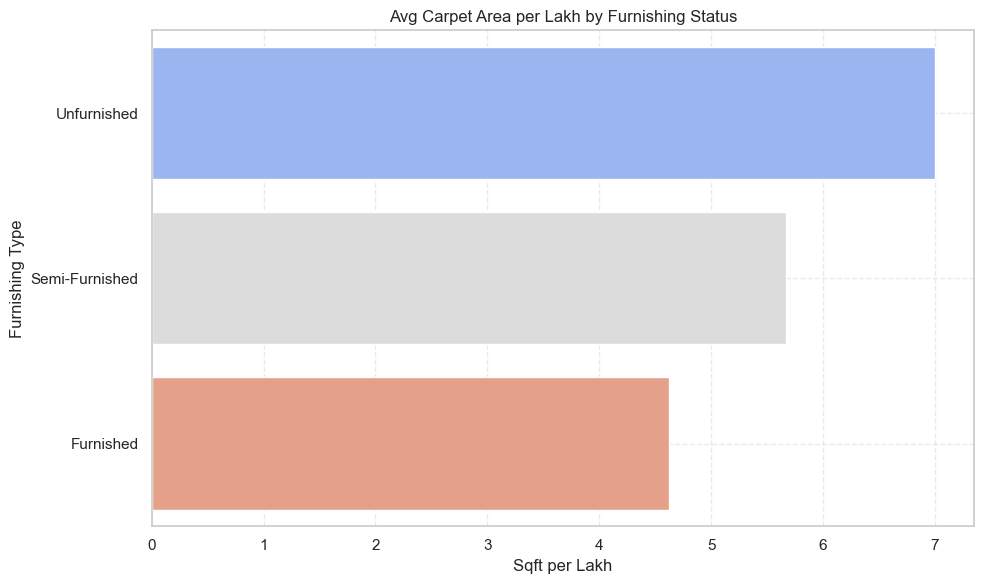

In [10]:
#furnishing status vs value efficiency

furnish_value = df.groupby('furnished_type')['carpet_per_lakh'].mean().sort_values(ascending=False).round(2).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='carpet_per_lakh', y='furnished_type', data=furnish_value, palette='coolwarm')
plt.title('Avg Carpet Area per Lakh by Furnishing Status')
plt.xlabel('Sqft per Lakh')
plt.ylabel('Furnishing Type')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()